In [21]:
%matplotlib inline

In [22]:
import os
import json
from collections import defaultdict
import pandas as pd
import fnmatch
import seaborn as sns
from matplotlib import pyplot as plt
import abp_experiments

In [23]:
path_prefix="/u/r/l/rl/Documents/CS740/Project/abpcrawler/"


In [7]:
#directories=["only_element_hiding_general","only_element_hiding_specific","blacklist_with_element_filter",
#             "element_hiding_general_specific","normal_adblock" ,"no_abp"]
directories= []

In [24]:
directories=['except','easylist']

In [25]:
count_dict={}

def file_list(dire):
    return [f.split("-2016")[0] for f in os.listdir(path_prefix+dire) if f.endswith(".json") ]
all_files = []
file_list_dict={}
for dire in directories: 
    files=file_list(dire)
    all_files+=files
    file_list_dict[dire]=files

    



        
        

In [26]:
filed=[(f,map(lambda d: file_list_dict[d].count(f), directories)) for f  in set(all_files)]


In [27]:
total_sites_in_all_dir = len(dict(filed))


In [28]:
sites_needed= set([f[0] for f in filed if len(set(f[1]))==1] )

In [29]:
def parse_json(json_file,abp_type):
    
  final_data=[]
  json_dict=defaultdict()
  with open(json_file) as js:
    json_data = json.load(js)
  if json_data is not None:  
       
     website=os.path.basename(json_file).split("-2016")[0]   
     for r in  json_data['requests']:
         json_dict['exp_type']=abp_type   
         json_dict=defaultdict()   
         json_dict['website']   = website
         json_dict['url'] = json_data['url']
         json_dict['filter_type'] = r['contentType']   
         json_dict['filter'] = r['filter']   
         json_dict['location'] = r['location']      
         final_data.append(json_dict) 
  return (json_data['url'],final_data)
            
        
         
         
  
    
    

In [30]:
records=[]
file_name_records=[]
for d in directories:
  for f in os.listdir(path_prefix+d):
        if fnmatch.fnmatch(f,'*.json'):
          url,data=parse_json(os.path.join(path_prefix,d,f),d)
          file_name_records.append({'abp_type':d,'file':f,'url':url})
          records=records+data  

In [13]:
records=[]
file_name_records=[]
for d in directories:
  for f in os.listdir(path_prefix+d):
    for files in sites_needed:      
        if fnmatch.fnmatch(f, files+'*.json'):
          url,data=parse_json(os.path.join(path_prefix,d,f),d)
          file_name_records.append({'abp_type':d,'file':f,'url':url})
          records=records+data  
        
        
            

In [31]:
data=pd.DataFrame.from_records(records)

# Data Visualization

###  Web sites crawled and web pages count

In [32]:
data.head()

,exp_type,filter,filter_type,location,url,website
0,except,None,STYLESHEET,http://www.pcmag.com/Content/responsive/css/ar...,"http://www.pcmag.com/article2/0,2817,1837178,0...",www.pcmag.com
1,except,None,SCRIPT,http://ajax.googleapis.com/ajax/libs/jquery/1....,"http://www.pcmag.com/article2/0,2817,1837178,0...",www.pcmag.com
2,except,None,SCRIPT,http://cdn.optimizely.com/js/211126830.js,"http://www.pcmag.com/article2/0,2817,1837178,0...",www.pcmag.com
3,except,None,STYLESHEET,https://maxcdn.bootstrapcdn.com/font-awesome/4...,"http://www.pcmag.com/article2/0,2817,1837178,0...",www.pcmag.com
4,except,None,SCRIPT,http://static.pcmag.com/js/zdccg/1.0.2/zdccg.m...,"http://www.pcmag.com/article2/0,2817,1837178,0...",www.pcmag.com


In [52]:
df=pd.DataFrame(data[data['exp_type']=='normal_adblock'].groupby(['website'])['url'].nunique(),index=None)
df=df.reset_index()

In [54]:
df.columns=["website","count"]

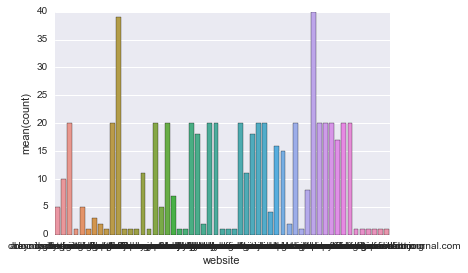

In [61]:
bar_plot = sns.barplot(x="website", y="count", data=df)

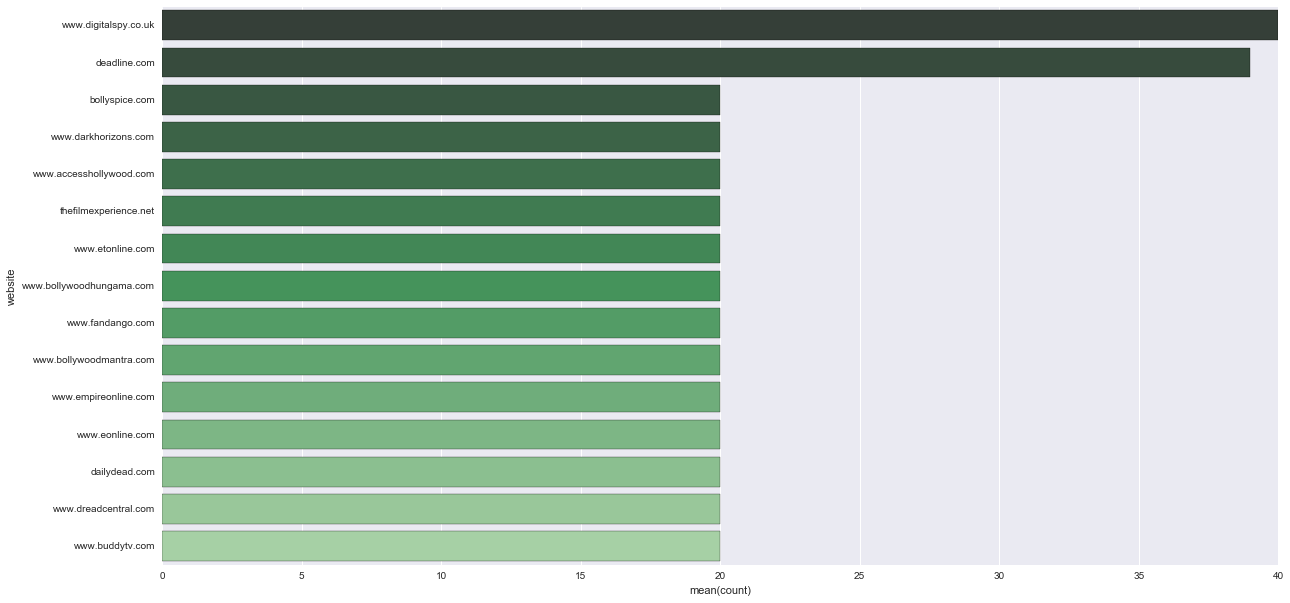

In [106]:
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(x="count",y="website" ,data=df.sort(['count'],ascending=False).head(15), palette="Greens_d")


### No of filters applied

In [156]:
#filter_index_data=data[data['filter'].apply(lambda val: not (val is None))].groupby(['exp_type','filter_type'])\
#['location'].nunique()
filter_index_data=data[data['filter'].apply(lambda val: not (val is None))]

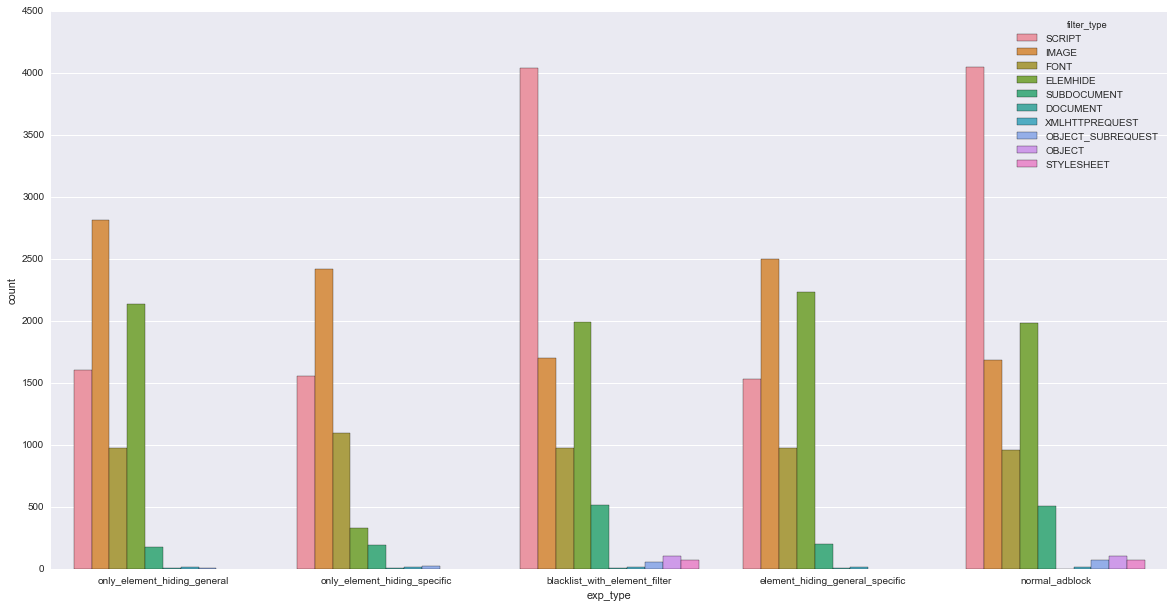

In [170]:
f, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="exp_type", hue="filter_type", data=filter_index_data)

### Most Frequently used script filter

In [15]:
filter_data = data[data['filter'].apply(lambda val: not (val is None))]

In [16]:
script_data = filter_data[filter_data['filter_type']=="SCRIPT"]

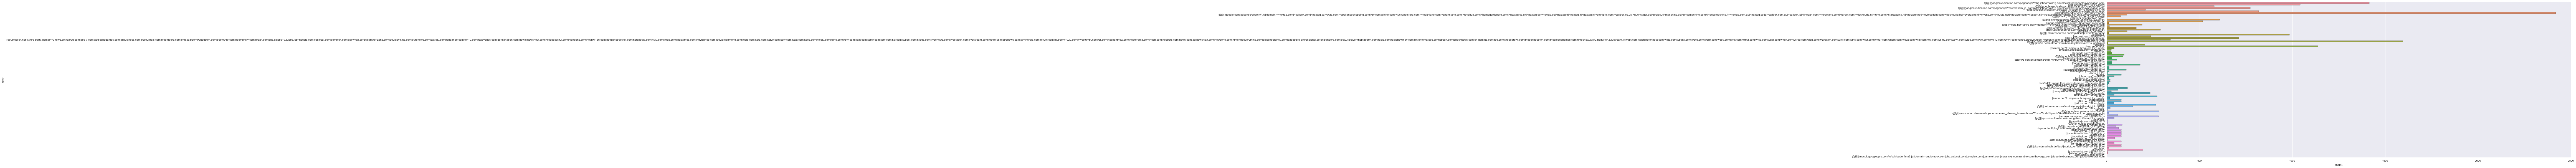

In [24]:
f, ax = plt.subplots(figsize=(30,10))
sns.countplot(y="filter", data=script_data)

In [36]:
data[data['filter'].apply(lambda val: val is None)]['filter_type'].unique()

array([u'STYLESHEET', u'SCRIPT', u'IMAGE', u'SUBDOCUMENT',
       u'XMLHTTPREQUEST', u'FONT', u'OBJECT', u'OBJECT_SUBREQUEST',
       u'OTHER', u'PING', u'MEDIA'], dtype=object)

### Most Widely used element filter

In [25]:
filter_data = data[data['filter'].apply(lambda val: not (val is None))]

In [26]:
elem_data = filter_data[filter_data['filter_type']=="ELEM"]

In [34]:
filter_data

,exp_type,filter,filter_type,location,url,website
156,only_element_hiding_general,@@||googlesyndication.com/pagead/js/*/abg.js$d...,SCRIPT,https://tpc.googlesyndication.com/pagead/js/r2...,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
159,only_element_hiding_general,@@||googlesyndication.com/pagead/js/*/abg.js$d...,SCRIPT,https://tpc.googlesyndication.com/pagead/js/r2...,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
165,only_element_hiding_general,@@||adnxs.com/bounce^,IMAGE,http://ib.adnxs.com/bounce?%2Fgetuid%3Fhttp%25...,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
170,only_element_hiding_general,@@||adnxs.com/getuid^,IMAGE,http://ib.adnxs.com/getuid?http%3A%2F%2Fs.cpx....,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
174,only_element_hiding_general,@@||gstatic.com^$third-party,SCRIPT,https://ssl.gstatic.com/accounts/o/1077434459-...,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
176,only_element_hiding_general,@@||gstatic.com^$third-party,SCRIPT,https://ssl.gstatic.com/accounts/o/1077434459-...,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
183,only_element_hiding_general,@@||gstatic.com^$third-party,SCRIPT,https://ssl.gstatic.com/accounts/o/1077434459-...,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
185,only_element_hiding_general,@@||gstatic.com^$third-party,SCRIPT,https://ssl.gstatic.com/accounts/o/1077434459-...,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
186,only_element_hiding_general,@@||gstatic.com^$third-party,FONT,https://fonts.gstatic.com/s/roboto/v15/2UX7WLT...,http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com
188,only_element_hiding_general,"##div[id^=""zergnet-widget-""]",ELEMHIDE,"##div[id^=""zergnet-widget-""]",http://www.28dayslateranalysis.com/2016/04/thi...,www.28dayslateranalysis.com


In [ ]:
f, ax = plt.subplots(figsize=(30,10))
sns.countplot(y="filter", data=script_data)

In [37]:
from notebook.auth import passwd

In [38]:
passwd()


Enter password: ········
Verify password: ········


'sha1:97b1595beb6e:536f21597337d2c4ec4c51360625fe8fbfeea09b'

In [34]:
data.groupby(['exp_type']).count()

,filter,filter_type,location,url,website
exp_type,,,,,
easylist,236,236,236,236,236
except,245,245,245,245,245
